___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [53]:
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling (1).csv')
df.shape

(10000, 14)

In [56]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [57]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [58]:
# Drop the columns as explained above


In [59]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

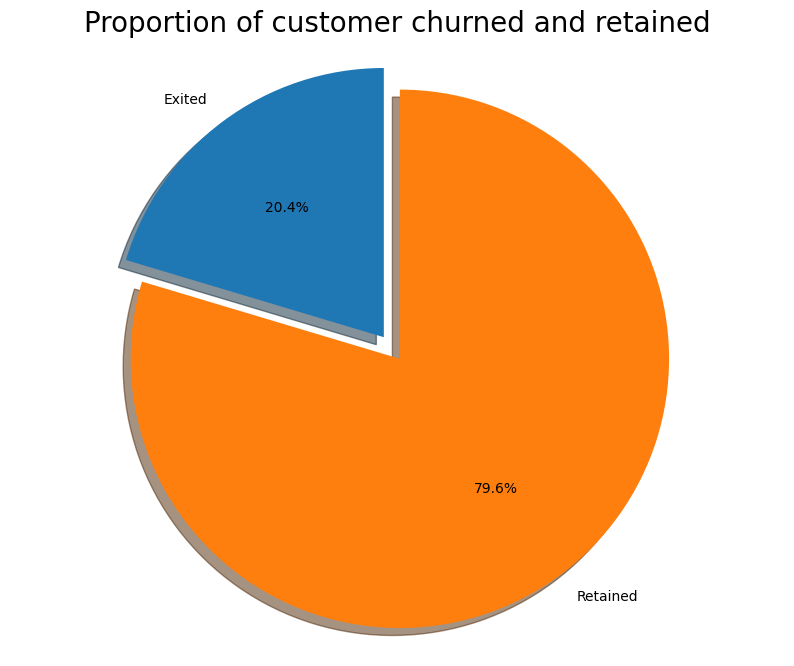

In [61]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [62]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [63]:
df = pd.get_dummies(df,drop_first=True)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [65]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [66]:
seed = 42

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [68]:
scaler = MinMaxScaler()

In [69]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [72]:
X_train.shape

(9000, 11)

In [73]:
X_test.shape

(1000, 11)

In [75]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [77]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 100, verbose=1)

Epoch 1/100
254/254 [==============================] - 2s 6ms/step - loss: 0.3387 - accuracy: 0.8602 - val_loss: 0.2913 - val_accuracy: 0.8889
Epoch 2/100
254/254 [==============================] - 2s 8ms/step - loss: 0.3369 - accuracy: 0.8586 - val_loss: 0.2982 - val_accuracy: 0.8844
Epoch 3/100
254/254 [==============================] - 1s 3ms/step - loss: 0.3371 - accuracy: 0.8611 - val_loss: 0.2900 - val_accuracy: 0.8856
Epoch 4/100
254/254 [==============================] - 1s 3ms/step - loss: 0.3371 - accuracy: 0.8604 - val_loss: 0.2943 - val_accuracy: 0.8878
Epoch 5/100
254/254 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8601 - val_loss: 0.2986 - val_accuracy: 0.8856
Epoch 6/100
254/254 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8607 - val_loss: 0.2911 - val_accuracy: 0.8922
Epoch 7/100
254/254 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.8584 - val_loss: 0.2904 - val_accuracy: 0.8889

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 20)                240       
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 511 (2.00 KB)
Trainable params: 511 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.338713,0.860247,0.291293,0.888889
1,0.336902,0.858642,0.298250,0.884444
2,0.337077,0.861111,0.289979,0.885556
3,0.337139,0.860370,0.294321,0.887778
4,0.337843,0.860123,0.298601,0.885556


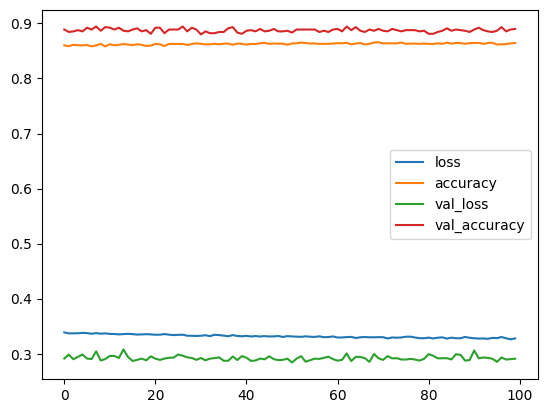

In [80]:
loss_df.plot();

In [81]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3398001492023468
accuracy :  0.859000027179718


In [82]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[757  39]
 [102 102]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       796
           1       0.72      0.50      0.59       204

    accuracy                           0.86      1000
   macro avg       0.80      0.73      0.75      1000
weighted avg       0.85      0.86      0.85      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [83]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [84]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [85]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=100,
          verbose=1,
          class_weight=class_weights)

Epoch 1/100
254/254 [==============================] - 2s 5ms/step - loss: 0.6580 - accuracy: 0.5425 - val_loss: 0.6075 - val_accuracy: 0.6744
Epoch 2/100
254/254 [==============================] - 1s 4ms/step - loss: 0.6215 - accuracy: 0.6395 - val_loss: 0.6055 - val_accuracy: 0.6733
Epoch 3/100
254/254 [==============================] - 1s 4ms/step - loss: 0.5958 - accuracy: 0.6748 - val_loss: 0.5465 - val_accuracy: 0.7356
Epoch 4/100
254/254 [==============================] - 1s 3ms/step - loss: 0.5771 - accuracy: 0.6998 - val_loss: 0.5735 - val_accuracy: 0.7044
Epoch 5/100
254/254 [==============================] - 1s 4ms/step - loss: 0.5609 - accuracy: 0.7191 - val_loss: 0.5146 - val_accuracy: 0.7456
Epoch 6/100
254/254 [==============================] - 1s 4ms/step - loss: 0.5440 - accuracy: 0.7342 - val_loss: 0.5210 - val_accuracy: 0.7356
Epoch 7/100
254/254 [==============================] - 1s 5ms/step - loss: 0.5273 - accuracy: 0.7506 - val_loss: 0.4538 - val_accuracy: 0.8033

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

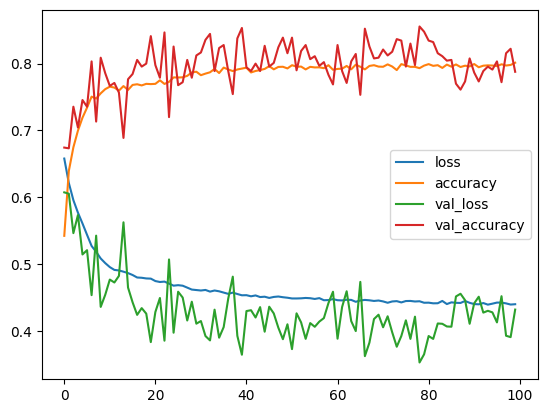

In [86]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [87]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.46780920028686523
accuracy :  0.7670000195503235


In [88]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[609 187]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       796
           1       0.46      0.77      0.58       204

    accuracy                           0.77      1000
   macro avg       0.69      0.77      0.71      1000
weighted avg       0.83      0.77      0.79      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [89]:
from tensorflow.keras.optimizers import Adam

In [90]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [92]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=100,
          verbose=1,
          class_weight=class_weights)

Epoch 1/100
254/254 [==============================] - 1s 6ms/step - loss: 0.4510 - accuracy: 0.7906 - val_loss: 0.4267 - val_accuracy: 0.8000
Epoch 2/100
254/254 [==============================] - 1s 5ms/step - loss: 0.4495 - accuracy: 0.7928 - val_loss: 0.3982 - val_accuracy: 0.8278
Epoch 3/100
254/254 [==============================] - 1s 3ms/step - loss: 0.4501 - accuracy: 0.7937 - val_loss: 0.3928 - val_accuracy: 0.8311
Epoch 4/100
254/254 [==============================] - 1s 3ms/step - loss: 0.4507 - accuracy: 0.7894 - val_loss: 0.4388 - val_accuracy: 0.7789
Epoch 5/100
254/254 [==============================] - 1s 3ms/step - loss: 0.4505 - accuracy: 0.7911 - val_loss: 0.3946 - val_accuracy: 0.8256
Epoch 6/100
254/254 [==============================] - 1s 3ms/step - loss: 0.4509 - accuracy: 0.7911 - val_loss: 0.4203 - val_accuracy: 0.8000
Epoch 7/100
254/254 [==============================] - 1s 3ms/step - loss: 0.4490 - accuracy: 0.7914 - val_loss: 0.3928 - val_accuracy: 0.8244

<Axes: >

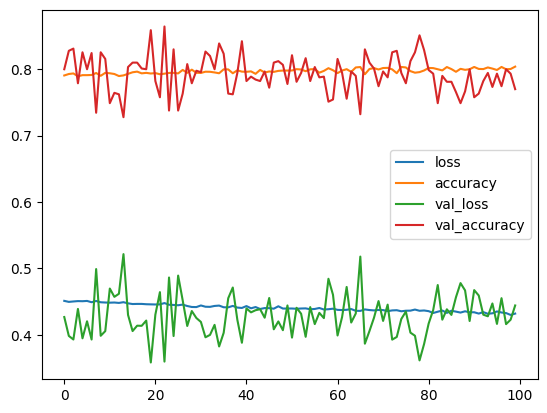

In [93]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [94]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4754829406738281
accuracy :  0.7730000019073486


In [95]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[617 179]
 [ 48 156]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.84       796
           1       0.47      0.76      0.58       204

    accuracy                           0.77      1000
   macro avg       0.70      0.77      0.71      1000
weighted avg       0.83      0.77      0.79      1000



### Add Dropout Layer

In [96]:
from tensorflow.keras.layers import Dropout

In [97]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(10, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(5, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [98]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=100,
          verbose=1,
          class_weight=class_weights)

Epoch 1/100
254/254 [==============================] - 2s 4ms/step - loss: 0.7142 - accuracy: 0.3919 - val_loss: 0.6898 - val_accuracy: 0.7122
Epoch 2/100
254/254 [==============================] - 1s 3ms/step - loss: 0.6966 - accuracy: 0.6206 - val_loss: 0.6919 - val_accuracy: 0.7722
Epoch 3/100
254/254 [==============================] - 1s 3ms/step - loss: 0.6875 - accuracy: 0.6344 - val_loss: 0.6829 - val_accuracy: 0.7978
Epoch 4/100
254/254 [==============================] - 1s 4ms/step - loss: 0.6875 - accuracy: 0.6621 - val_loss: 0.6764 - val_accuracy: 0.8111
Epoch 5/100
254/254 [==============================] - 1s 5ms/step - loss: 0.6845 - accuracy: 0.6464 - val_loss: 0.6813 - val_accuracy: 0.7433
Epoch 6/100
254/254 [==============================] - 1s 4ms/step - loss: 0.6798 - accuracy: 0.6359 - val_loss: 0.6706 - val_accuracy: 0.7689
Epoch 7/100
254/254 [==============================] - 1s 4ms/step - loss: 0.6742 - accuracy: 0.6881 - val_loss: 0.6576 - val_accuracy: 0.7711

<Axes: >

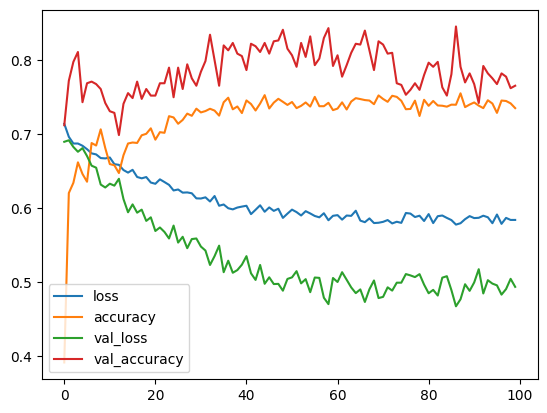

In [99]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [100]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5312960743904114
accuracy :  0.734000027179718


In [101]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[571 225]
 [ 41 163]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       796
           1       0.42      0.80      0.55       204

    accuracy                           0.73      1000
   macro avg       0.68      0.76      0.68      1000
weighted avg       0.83      0.73      0.76      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [102]:
from tensorflow.keras.callbacks import EarlyStopping

In [103]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [104]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [105]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=100,
          verbose=1,
          callbacks = [early_stop],
          class_weight=class_weights)

Epoch 1/100
254/254 [==============================] - 3s 5ms/step - loss: 0.6636 - accuracy: 0.6683 - val_loss: 0.6100 - val_accuracy: 0.6944
Epoch 2/100
254/254 [==============================] - 1s 4ms/step - loss: 0.6147 - accuracy: 0.6543 - val_loss: 0.5859 - val_accuracy: 0.6989
Epoch 3/100
254/254 [==============================] - 1s 4ms/step - loss: 0.5956 - accuracy: 0.6757 - val_loss: 0.5657 - val_accuracy: 0.7022
Epoch 4/100
254/254 [==============================] - 1s 3ms/step - loss: 0.5869 - accuracy: 0.6870 - val_loss: 0.5893 - val_accuracy: 0.6856
Epoch 5/100
254/254 [==============================] - 1s 3ms/step - loss: 0.5842 - accuracy: 0.6896 - val_loss: 0.5316 - val_accuracy: 0.7356
Epoch 6/100
254/254 [==============================] - 1s 4ms/step - loss: 0.5799 - accuracy: 0.6951 - val_loss: 0.5502 - val_accuracy: 0.7178
Epoch 7/100
254/254 [==============================] - 1s 4ms/step - loss: 0.5771 - accuracy: 0.6993 - val_loss: 0.5092 - val_accuracy: 0.7489

<Axes: >

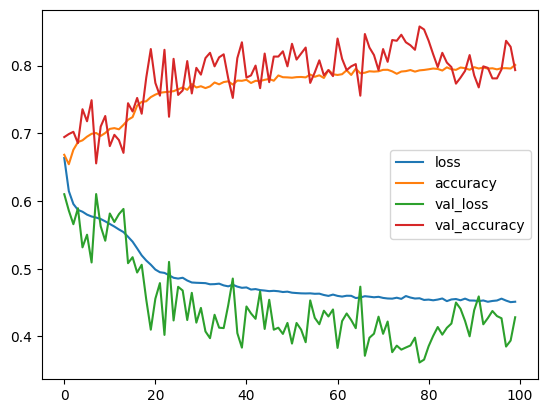

In [106]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [107]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.46748560667037964
accuracy :  0.7720000147819519


#### Monitor the "val_recall" as metric

In [108]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[613 183]
 [ 45 159]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       796
           1       0.46      0.78      0.58       204

    accuracy                           0.77      1000
   macro avg       0.70      0.77      0.71      1000
weighted avg       0.84      0.77      0.79      1000



## Optuna

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 2ms/step


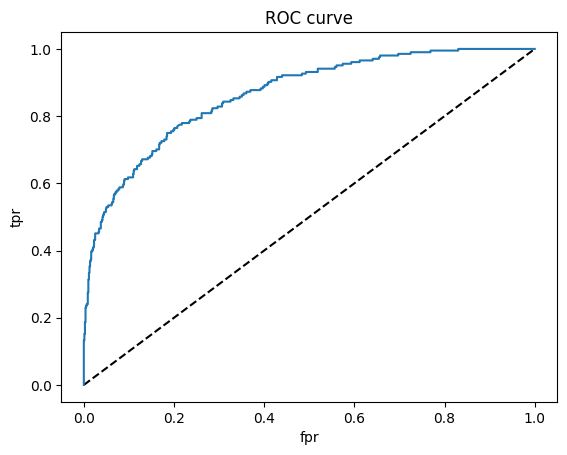

In [109]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [110]:
roc_auc_score(y_test, y_pred_proba)

0.865220711400138

In [112]:
roc_auc_score(y_test, y_pred_proba)

0.865220711400138

# Final Model and Model Deployment

In [113]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [114]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [115]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [117]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 200, verbose = 1,
          callbacks = [early_stop])

Epoch 1/200
282/282 [==============================] - 1s 4ms/step - loss: 0.3706 - accuracy: 0.8427 - val_loss: 0.3721 - val_accuracy: 0.8400
Epoch 2/200
282/282 [==============================] - 1s 4ms/step - loss: 0.3615 - accuracy: 0.8486 - val_loss: 0.3755 - val_accuracy: 0.8460
Epoch 3/200
282/282 [==============================] - 1s 4ms/step - loss: 0.3581 - accuracy: 0.8493 - val_loss: 0.3698 - val_accuracy: 0.8450
Epoch 4/200
282/282 [==============================] - 1s 4ms/step - loss: 0.3554 - accuracy: 0.8523 - val_loss: 0.3655 - val_accuracy: 0.8540
Epoch 5/200
282/282 [==============================] - 1s 3ms/step - loss: 0.3523 - accuracy: 0.8538 - val_loss: 0.3585 - val_accuracy: 0.8500
Epoch 6/200
282/282 [==============================] - 1s 3ms/step - loss: 0.3506 - accuracy: 0.8522 - val_loss: 0.3567 - val_accuracy: 0.8510
Epoch 7/200
282/282 [==============================] - 1s 2ms/step - loss: 0.3497 - accuracy: 0.8559 - val_loss: 0.3566 - val_accuracy: 0.8530

<Axes: >

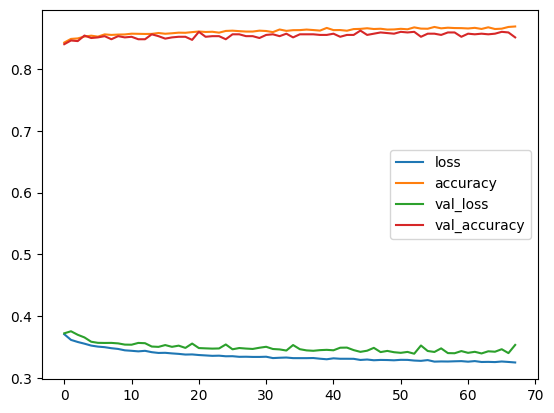

In [118]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [119]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.33914321660995483
accuracy :  0.8600000143051147


In [120]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[763  33]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.75      0.48      0.58       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [121]:
model.save('model_exited.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Prediction

In [122]:
def predict_exit(sample_value):

  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = sc.transform(sample_value)

  return classifier.predict(sample_value)

In [123]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

In [ ]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___